# **Maximum Likelihood Estimation**

This notebook applies maximum likelihood estimation to a simple linear regression problem to investigate the equivalence of least squares estimation (squared error minimisation) and maximum likelihood estimation (likelihood function maximisation) in a Gaussian model. The derivation of this equivalence is outlined in the Bishop textbook, but is also breifly outlined [here](https://stats.stackexchange.com/questions/12562/equivalence-between-least-squares-and-mle-in-gaussian-model). This Notebook is based on the tutorial [here](https://analyticsindiamag.com/maximum-likelihood-estimation-python-guide/).

In [8]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 

## **Generate Gaussian-distributed data**

In [9]:
# independent variable space
x = np.linspace(-10, 30, 100)

# Gaussian distributed residuals
e = np.random.normal(10, 5, 100)

# target data
y = 10 + 4 * x + e

,x,y
0,-10.000000,-23.209803
1,-9.595960,-21.013980
2,-9.191919,-10.971560
3,-8.787879,-20.840842
4,-8.383838,-9.227712


Text(0.5, 0, 'x')

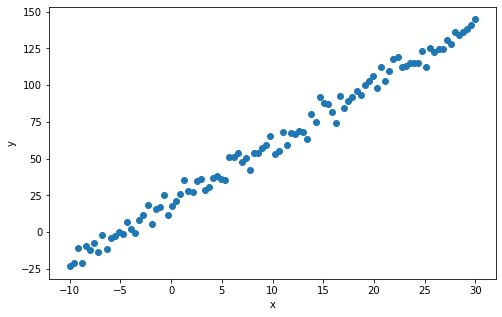

In [10]:
# plot data
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')

## **Ordinary Least Squares Estimation (Classic linear regression)**

In [51]:
# create and fit OLS model with statsmodels library 
features = api.add_constant(x)
ols_model = api.OLS(y, features).fit()

In [52]:
y_ols = ols_model.params["x"] * x + ols_model.params["const"]

In [53]:
# fit OLS parameters to estimate regression coefficients
res = model.resid
standard_dev = np.std(res)

## **Maximum Likelihood Estimation**

In [85]:
# define function to compute negative log likelihood
def MLE_Norm(parameters):
    # unpack parameters
    const, beta, std_dev = parameters
    # predict the output
    pred = const + beta * x
    # compute the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # compute negative log-likelihood
    neg_LL = -1 * LL
    return neg_LL 

In [86]:
# fit parameters through negative log-likelihood minimisation/ maximum likelihood estimation 
initial_params = [2,2,2]
mle_model = minimize(MLE_Norm, np.array(initial_params), method='L-BFGS-B')

In [60]:
y_mle = mle_model.x[0] + mle_model.x[1] * x 

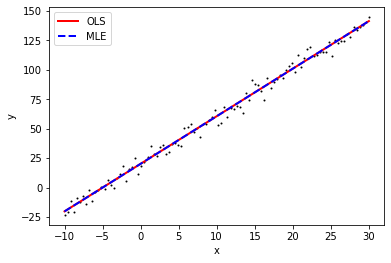

In [76]:
plt.scatter(x, y, marker='o', s=1, c='k')
plt.plot(x, y_ols, c='r', lw=2, label="OLS")
plt.plot(x, y_mle, c='b', lw=2, linestyle='--', label="MLE")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()